In [1]:
import matplotlib.image as img 
from helpers import show_image 

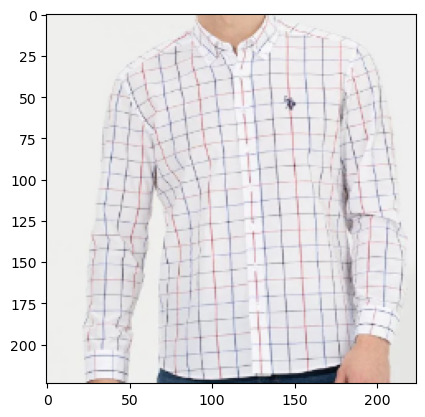

In [2]:
melanj = "../datasets/demos/uspa_sq2.PNG" 
show_image(melanj)

In [3]:
image = img.imread(melanj)
image.shape 

(394, 349, 4)

In [4]:
r = []
g = []
b = []
for row in image:
    for temp_r, temp_g, temp_b, temp in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b) 

In [5]:
print(len(r))
print(len(g))
print(len(b))

137506
137506
137506


In [6]:
image.shape[0] * image.shape[1]

137506

In [7]:
import pandas as pd 
df = pd.DataFrame({'red' : r,
                          'green' : g,
                          'blue' : b})

df.head() 

,red,green,blue
0,0.937255,0.937255,0.929412
1,0.937255,0.937255,0.929412
2,0.937255,0.937255,0.929412
3,0.937255,0.937255,0.929412
4,0.937255,0.937255,0.929412


In [8]:
from scipy.cluster.vq import whiten 
df['scaled_color_red'] = whiten(df['red'])
df['scaled_color_blue'] = whiten(df['blue'])
df['scaled_color_green'] = whiten(df['green'])

df.head() 

,red,green,blue,scaled_color_red,scaled_color_blue,scaled_color_green
0,0.937255,0.937255,0.929412,8.067997,7.825356,7.658983
1,0.937255,0.937255,0.929412,8.067997,7.825356,7.658983
2,0.937255,0.937255,0.929412,8.067997,7.825356,7.658983
3,0.937255,0.937255,0.929412,8.067997,7.825356,7.658983
4,0.937255,0.937255,0.929412,8.067997,7.825356,7.658983


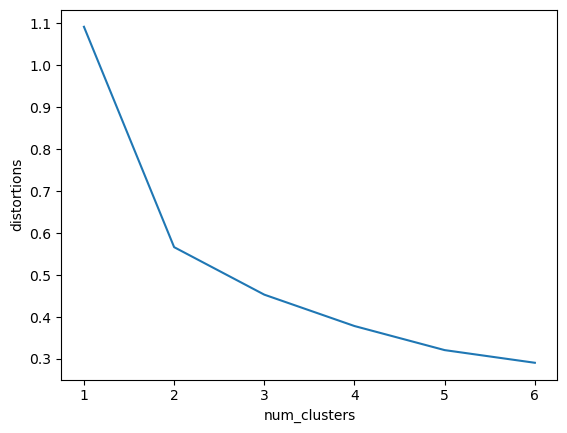

In [9]:
from scipy.cluster.vq import kmeans
import seaborn as sns 
import matplotlib.pyplot as plt 

# Preparing data to construct elbow plot.
distortions = []
num_clusters = range(1, 7)  #range of cluster sizes
 
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_color_red','scaled_color_blue', 'scaled_color_green']], i)
    distortions.append(distortion)
     
# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters' : num_clusters,
                           'distortions' : distortions})
 
# Create a line plot of num_clusters and distortions
sns.lineplot(x = 'num_clusters', y = 'distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

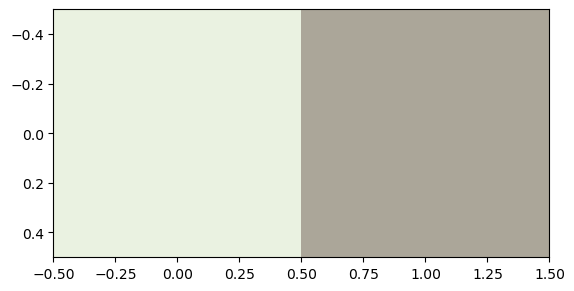

In [10]:
cluster_centers, _ = kmeans(df[['scaled_color_red',
                                'scaled_color_blue',
                                'scaled_color_green']], 2)
 
dominant_colors = []
 
# Get standard deviations of each color
red_std, green_std, blue_std = df[['red','green', 'blue']].std()
 
for cluster_center in cluster_centers:
    red_scaled, green_scaled, blue_scaled = cluster_center
 
    # Convert each standardized value to scaled value
    dominant_colors.append((
        red_scaled * red_std ,
        green_scaled * green_std ,
        blue_scaled * blue_std
    ))
 
# Display colors of cluster centers
plt.imshow([dominant_colors])
plt.show()

In [11]:
cluster_centers

array([[7.9100924, 7.755671 , 7.4539666],
       [5.801818 , 5.339127 , 5.0678215]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


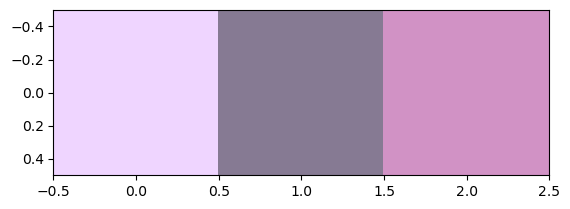

In [12]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd
 
batman_image = img.imread('../datasets/demos/uspa_sq.PNG')
 
r = []
g = []
b = []
for row in batman_image:
    for temp_r, temp_g, temp_b, temp in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
  
batman_df = pd.DataFrame({'red' : r,
                          'green' : g,
                          'blue' : b})
 
batman_df['scaled_color_red'] = whiten(batman_df['red'])
batman_df['scaled_color_blue'] = whiten(batman_df['blue'])
batman_df['scaled_color_green'] = whiten(batman_df['green'])
 
cluster_centers, _ = kmeans(batman_df[['scaled_color_red',
                                    'scaled_color_blue',
                                    'scaled_color_green']], 3)
 
dominant_colors = []
 
red_std, green_std, blue_std = batman_df[['red',
                                          'green',
                                          'blue']].std()
 
for cluster_center in cluster_centers:
    red_scaled, green_scaled, blue_scaled = cluster_center
    dominant_colors.append((
        red_scaled * red_std ,
        green_scaled * green_std ,
        blue_scaled * blue_std 
    ))
 
plt.imshow([dominant_colors])
plt.show()

In [13]:
dominant_colors

[(0.940522190149764, 0.8364929182299221, 1.0324307225545013),
 (0.528073249981702, 0.47971386861024, 0.578373063661406),
 (0.8218642034142931, 0.5751176508845859, 0.7729301326870157)]

# colorthief 

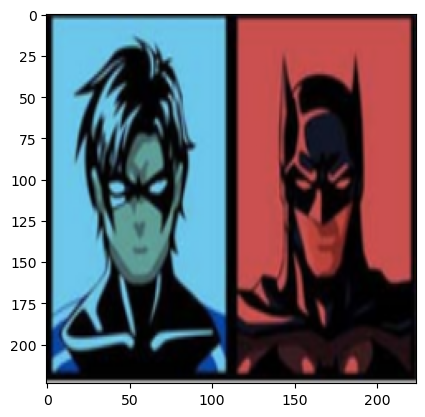

In [14]:
# !pip install colorthief
show_image("../datasets/demos/batman.png")

In [52]:
from colorthief import ColorThief 
import matplotlib.pyplot as plt 
import colorsys 

ct = ColorThief("../datasets/demos/stripped_uspa.PNG") 
dominant_colors = ct.get_color(quality=1) 


palette = ct.get_palette(color_count=3, quality=1) 
palette

[(118, 89, 92), (240, 239, 236), (30, 32, 40), (185, 178, 181)]

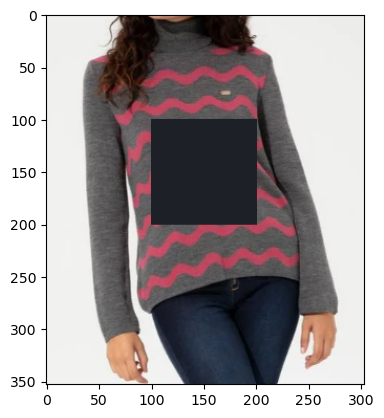

In [55]:
import cv2 

image = cv2.imread("../datasets/demos/stripped_uspa.PNG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv = cv2.rectangle(image, (100,100), (200,200), (30, 32, 40), -1)
plt.imshow(cv)